In [666]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Functions

# Load Data

## Federal Funds Rate

In [667]:
fed_df = pd.read_csv('./data/FEDFUNDS.csv', parse_dates=['DATE'])
fed_df.columns = ['date','fedfunds']
fed_df['year'] = fed_df['date'].dt.year
fed_df['month'] = fed_df['date'].dt.month
fed_df = fed_df[fed_df['month'] == 12]

fed_df['fedfunds_per_annual'] = round(fed_df['fedfunds'].pct_change(),4) * 100

fed_df.drop(labels=['date','month'], inplace=True, axis=1)
fed_df.set_index('year', drop=True, inplace=True)

fed_df

,fedfunds,fedfunds_per_annual
year,,
1954,1.28,NaN
1955,2.48,93.75
1956,2.94,18.55
1957,2.98,1.36
1958,2.42,-18.79
...,...,...
2018,2.27,74.62
2019,1.55,-31.72
2020,0.09,-94.19


In [668]:
long_df = fed_df.copy()
long_df['year'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

long_df

,year,variable,value
0,1954,fedfunds,1.28
1,1955,fedfunds,2.48
2,1956,fedfunds,2.94
3,1957,fedfunds,2.98
4,1958,fedfunds,2.42
...,...,...,...
133,2018,fedfunds_per_annual,74.62
134,2019,fedfunds_per_annual,-31.72
135,2020,fedfunds_per_annual,-94.19
136,2021,fedfunds_per_annual,-11.11


<Figure size 2000x800 with 0 Axes>

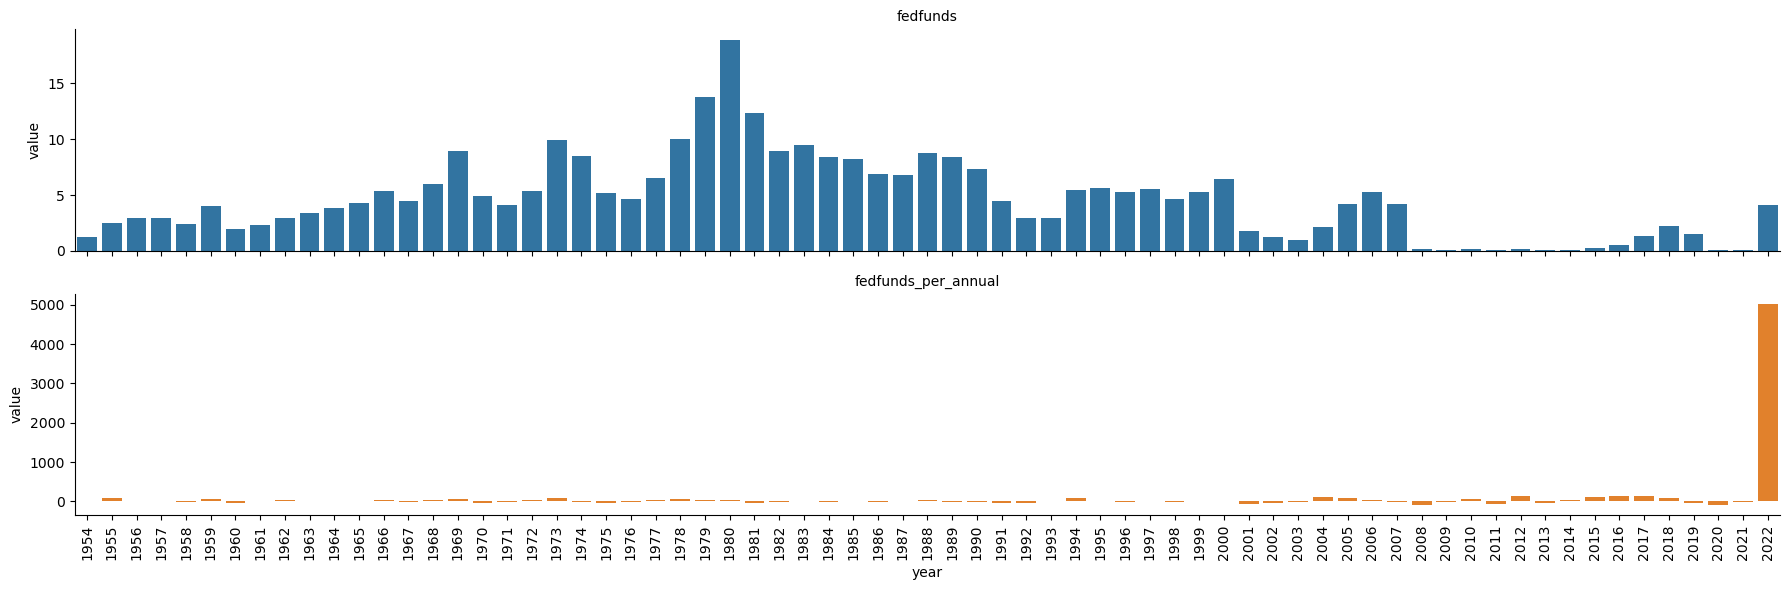

In [669]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.map_dataframe(sns.barplot, y="value", x="year")

plt.show()

## GDP

In [670]:
gdp_df = pd.read_csv('./data/united-states-gdp-growth-rate.csv', skiprows=16, parse_dates=['date'])
gdp_df['year'] = gdp_df['date'].dt.year
gdp_df.columns = ['date','gdp','gdp_per_annual','remove','year']
gdp_df.drop(labels=['remove','date'], inplace=True, axis=1)
gdp_df.set_index('year', drop=True, inplace=True)
gdp_df

,gdp,gdp_per_annual
year,,
1961,2.3000,NaN
1962,6.1000,3.80
1963,4.4000,-1.70
1964,5.8000,1.40
1965,6.4000,0.60
...,...,...
2018,2.9454,0.70
2019,2.2944,-0.65
2020,-2.7678,-5.06


In [671]:
long_df = gdp_df.copy()
long_df['year'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

long_df

,year,variable,value
0,1961,gdp,2.30
1,1962,gdp,6.10
2,1963,gdp,4.40
3,1964,gdp,5.80
4,1965,gdp,6.40
...,...,...,...
119,2018,gdp_per_annual,0.70
120,2019,gdp_per_annual,-0.65
121,2020,gdp_per_annual,-5.06
122,2021,gdp_per_annual,8.71


<Figure size 2000x800 with 0 Axes>

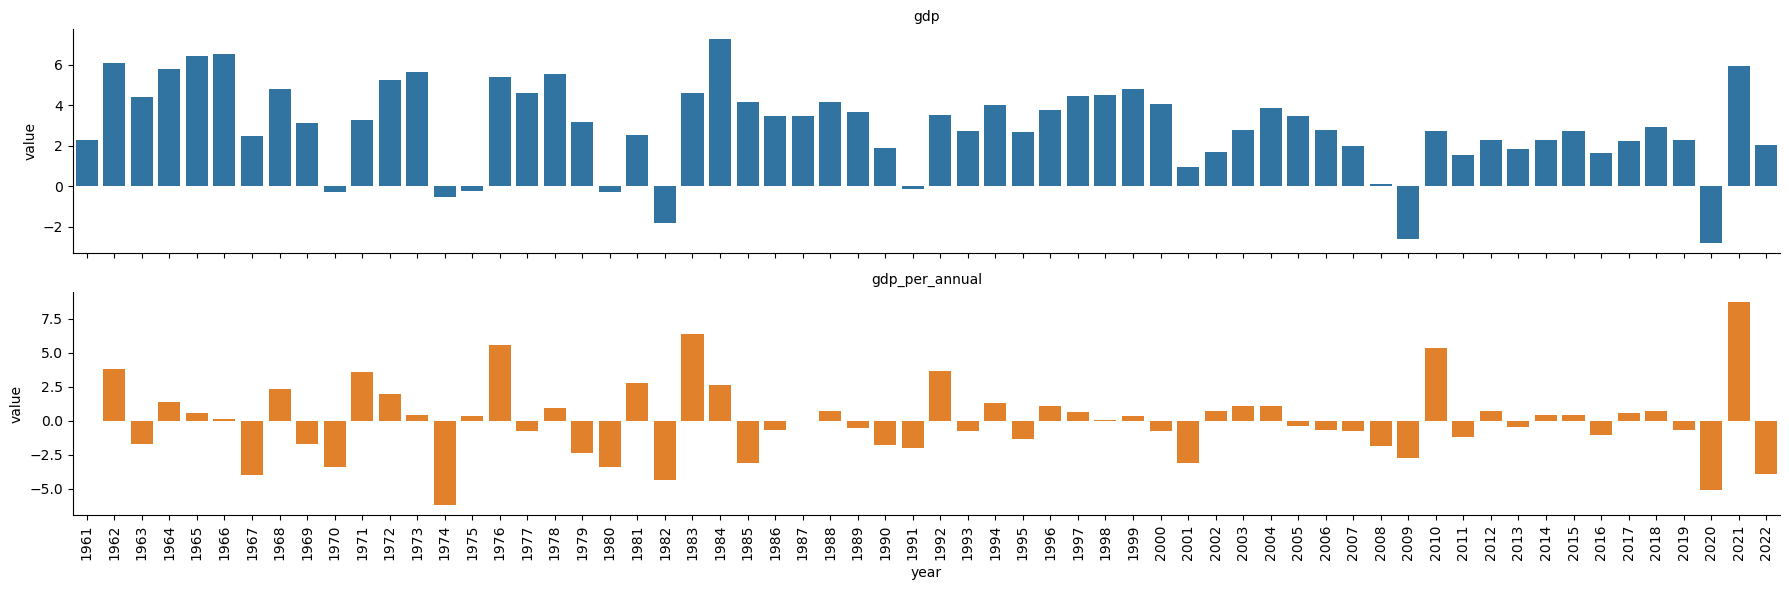

In [672]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.map_dataframe(sns.barplot, y="value", x="year")

plt.show()

## Consumer Price Index

In [673]:
cpi_df = pd.read_csv('./data/cpi_scrape.csv', dtype = {'Year': float,})
cpi_df

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Annual Avg,Percent Change Annual,Percent Change Avg
0,1913.0,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.9,10.000,10.000,10.100,10.000,9.900,–,–
1,1914.0,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.2,10.200,10.100,10.200,10.100,10.000,1,1
2,1915.0,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.1,10.100,10.200,10.300,10.300,10.100,2,1
3,1916.0,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.9,11.100,11.300,11.500,11.600,10.900,12.6,7.9
4,1917.0,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13,13.300,13.500,13.500,13.700,12.800,18.1,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021.0,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802,270.970,7,4.7
109,2022.0,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,296.797,292.655,6.5,8
110,2023.0,299.170,300.840,301.836,303.363,304.127,305.109,305.691,Avail.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sept.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [674]:
cpi_df = pd.read_csv('./data/cpi_scrape.csv', dtype = {'Year': float,})
cpi_df = cpi_df[['Year','Annual Avg','Percent Change Annual','Percent Change Avg']]
cpi_df.columns = ['year','cpi','cpi_per_annual','cpi_per_average']
cpi_df = cpi_df[:-3]
cpi_df = cpi_df[1:]
cpi_df['year'] = cpi_df['year'].astype('int')
cpi_df['cpi_per_annual'] = cpi_df['cpi_per_annual'].astype('float')
cpi_df['cpi_per_average'] = cpi_df['cpi_per_average'].astype('float')
cpi_df.set_index('year', drop=True, inplace=True)
cpi_df = cpi_df[1:]
#cpi_df.dropna(subset=['cpi_per_annual','cpi_per_average'],inplace=True)

#long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

cpi_df

,cpi,cpi_per_annual,cpi_per_average
year,,,
1915,10.100,2.0,1.0
1916,10.900,12.6,7.9
1917,12.800,18.1,17.4
1918,15.100,20.4,18.0
1919,17.300,14.5,14.6
...,...,...,...
2018,251.107,1.9,2.4
2019,255.657,2.3,1.8
2020,258.811,1.4,1.2


In [675]:
long_df = cpi_df.copy()
long_df['year'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

long_df

,year,variable,value
0,1915,cpi,10.1
1,1916,cpi,10.9
2,1917,cpi,12.8
3,1918,cpi,15.1
4,1919,cpi,17.3
...,...,...,...
319,2018,cpi_per_average,2.4
320,2019,cpi_per_average,1.8
321,2020,cpi_per_average,1.2
322,2021,cpi_per_average,4.7


<Figure size 2000x800 with 0 Axes>

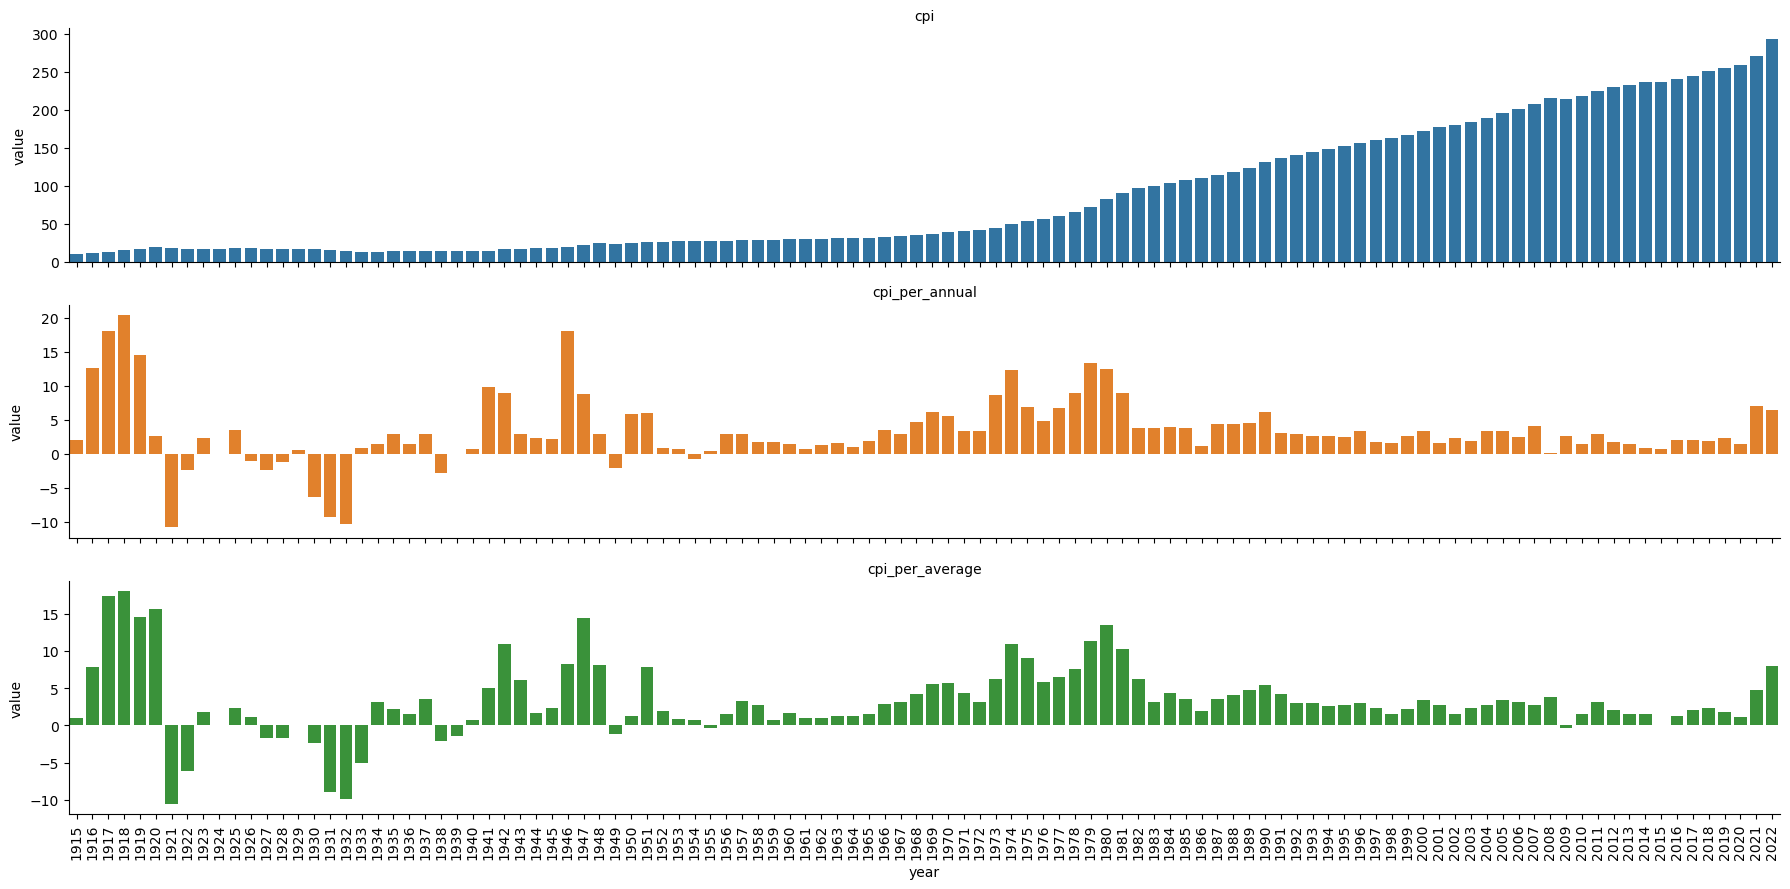

In [676]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.map_dataframe(sns.barplot, y="value", x="year")

plt.show()

# Merge Data

In [677]:
merge_df = fed_df.merge(gdp_df,how ='outer', left_index=True, right_index=True).merge(cpi_df,how ='outer', left_index=True, right_index=True)
merge_df = merge_df[['fedfunds','gdp','cpi_per_annual']]
merge_df['year'] = merge_df.index
merge_df

,fedfunds,gdp,cpi_per_annual,year
year,,,,
1915,NaN,NaN,2.0,1915
1916,NaN,NaN,12.6,1916
1917,NaN,NaN,18.1,1917
1918,NaN,NaN,20.4,1918
1919,NaN,NaN,14.5,1919
...,...,...,...,...
2018,2.27,2.9454,1.9,2018
2019,1.55,2.2944,2.3,2019
2020,0.09,-2.7678,1.4,2020


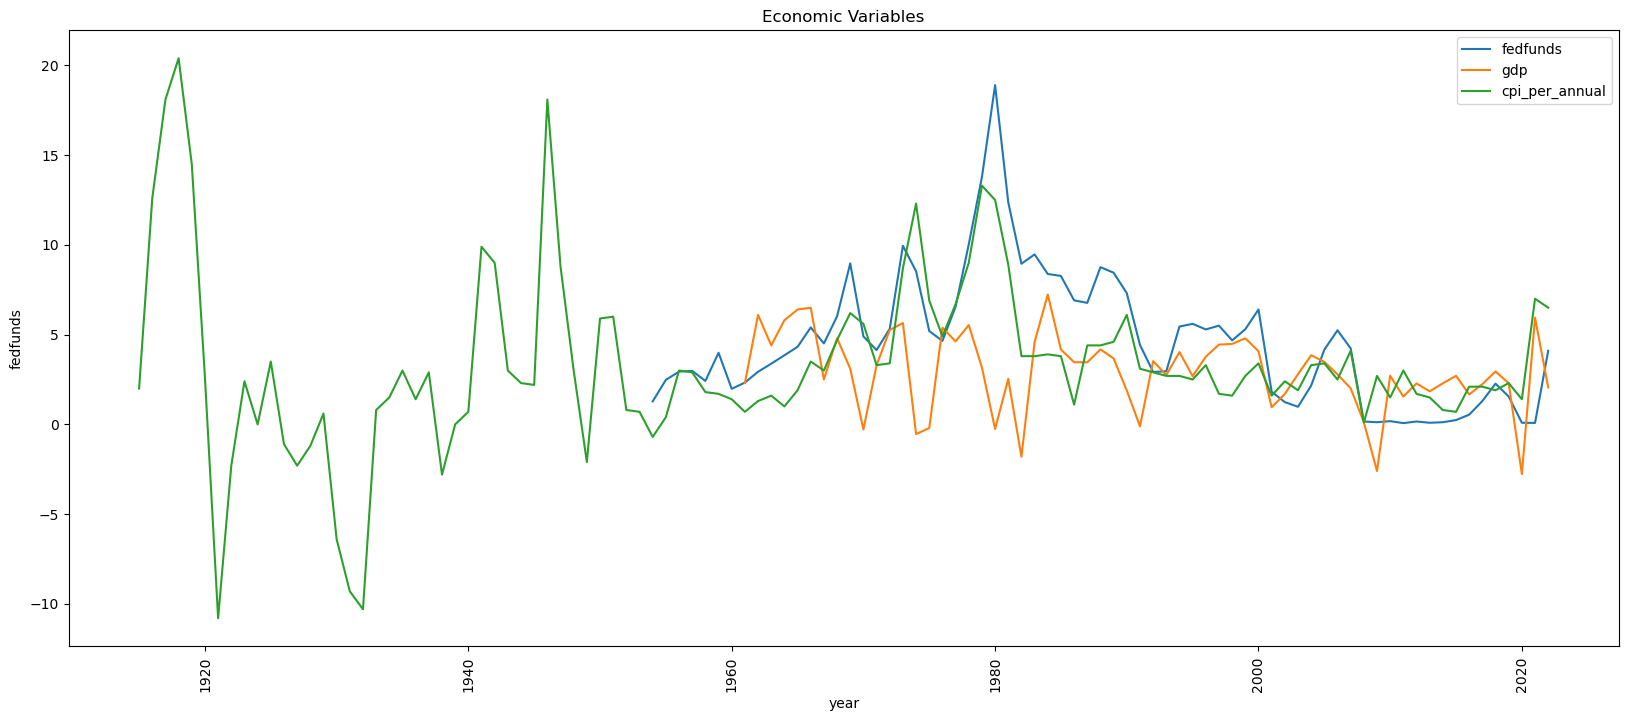

In [678]:
plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=merge_df, x='year', y='fedfunds' , label='fedfunds')
sns.lineplot(data=merge_df, x='year', y='gdp' , label='gdp')
sns.lineplot(data=merge_df, x='year', y='cpi_per_annual' , label='cpi_per_annual')
plt.show()

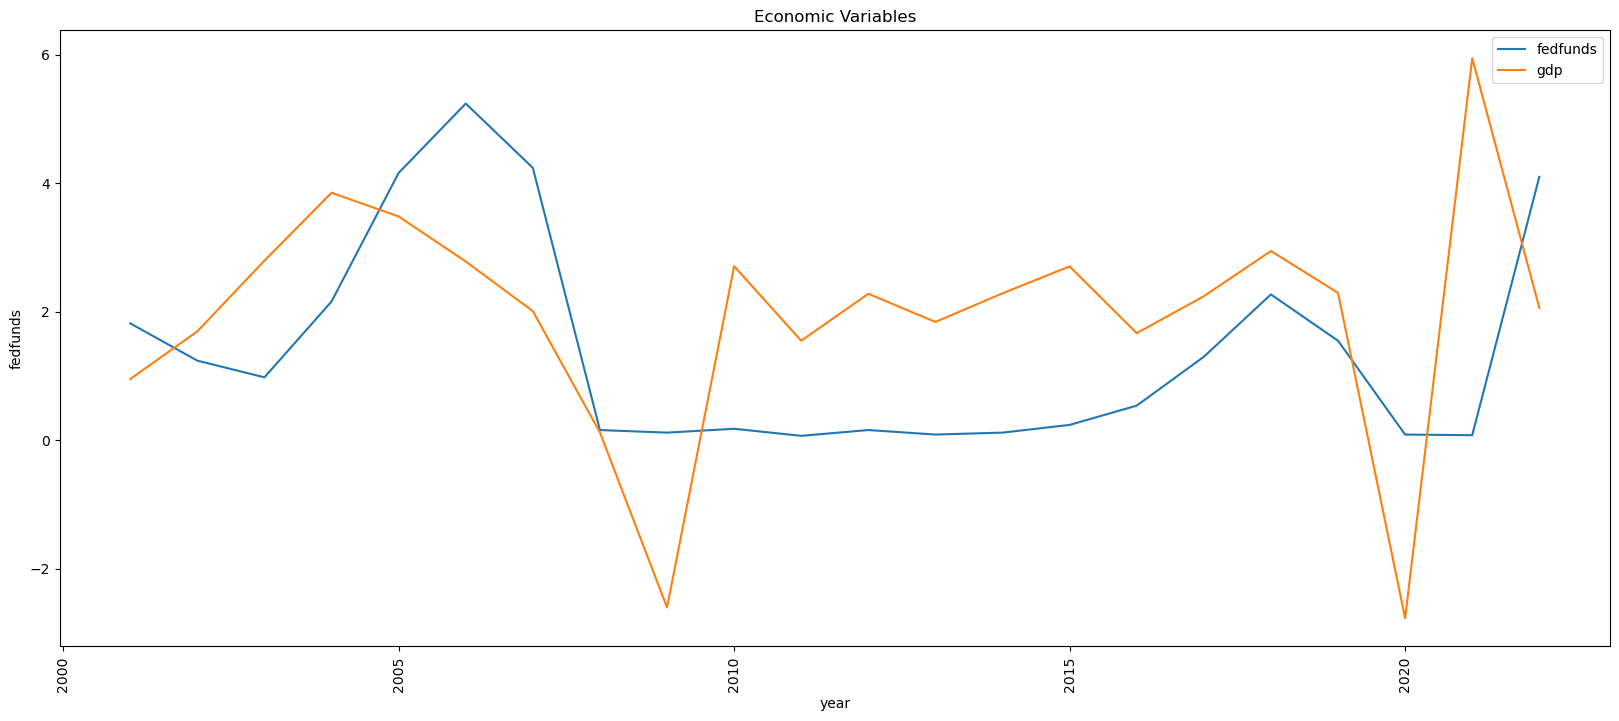

In [679]:
t_df = merge_df[(merge_df['year'] > 2000) & (merge_df['year'] < 2023)].copy()

plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=t_df, x='year', y='fedfunds' , label='fedfunds')
sns.lineplot(data=t_df, x='year', y='gdp' , label='gdp')
#sns.lineplot(data=t_df, x='year', y='cpi_per_annual' , label='cpi_per_annual')
plt.show()

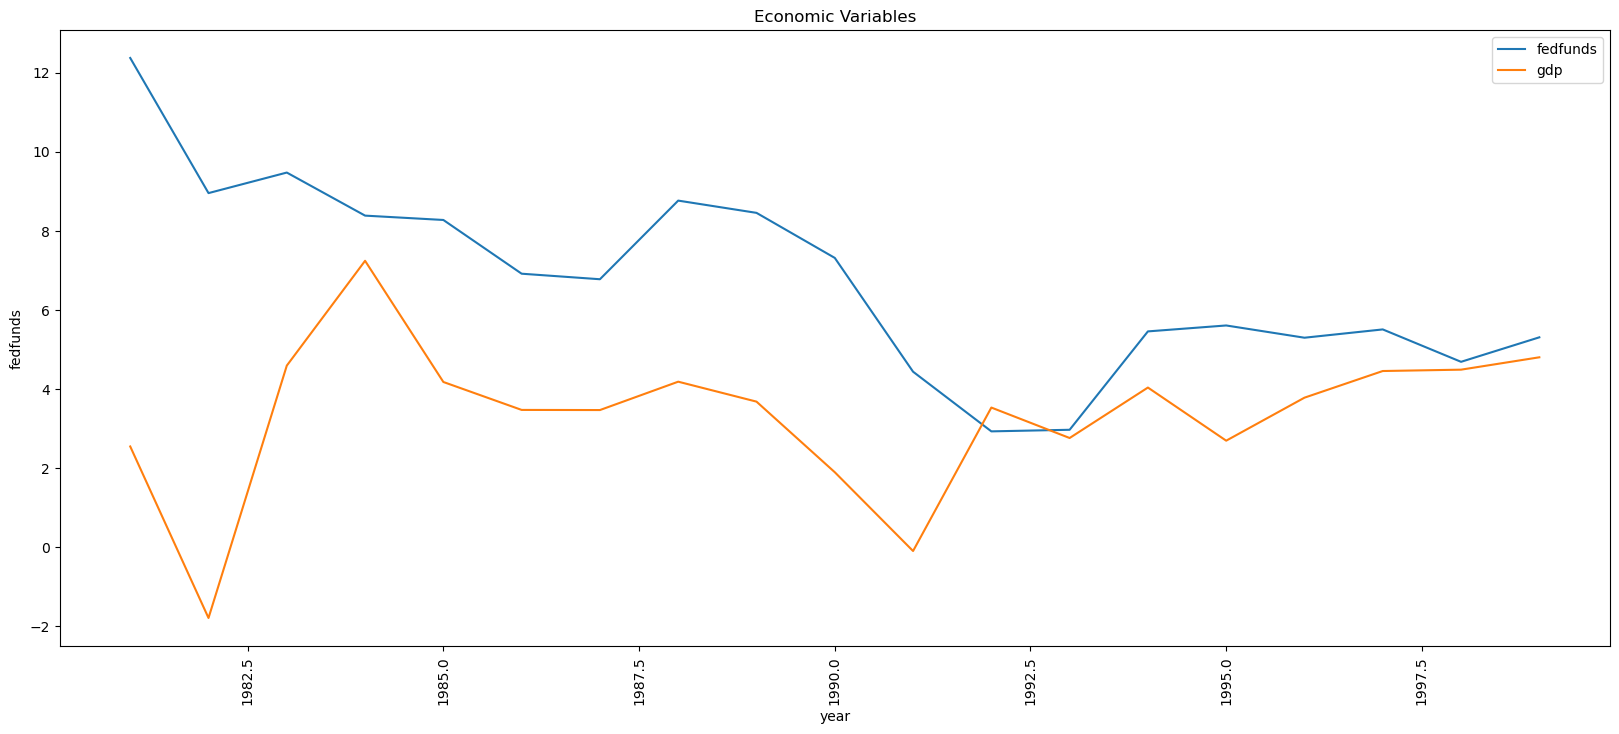

In [680]:
t_df = merge_df[(merge_df['year'] > 1980) & (merge_df['year'] < 2000)].copy()

plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=t_df, x='year', y='fedfunds' , label='fedfunds')
sns.lineplot(data=t_df, x='year', y='gdp' , label='gdp')
#sns.lineplot(data=t_df, x='year', y='cpi_per_annual' , label='cpi_per_annual')
plt.show()

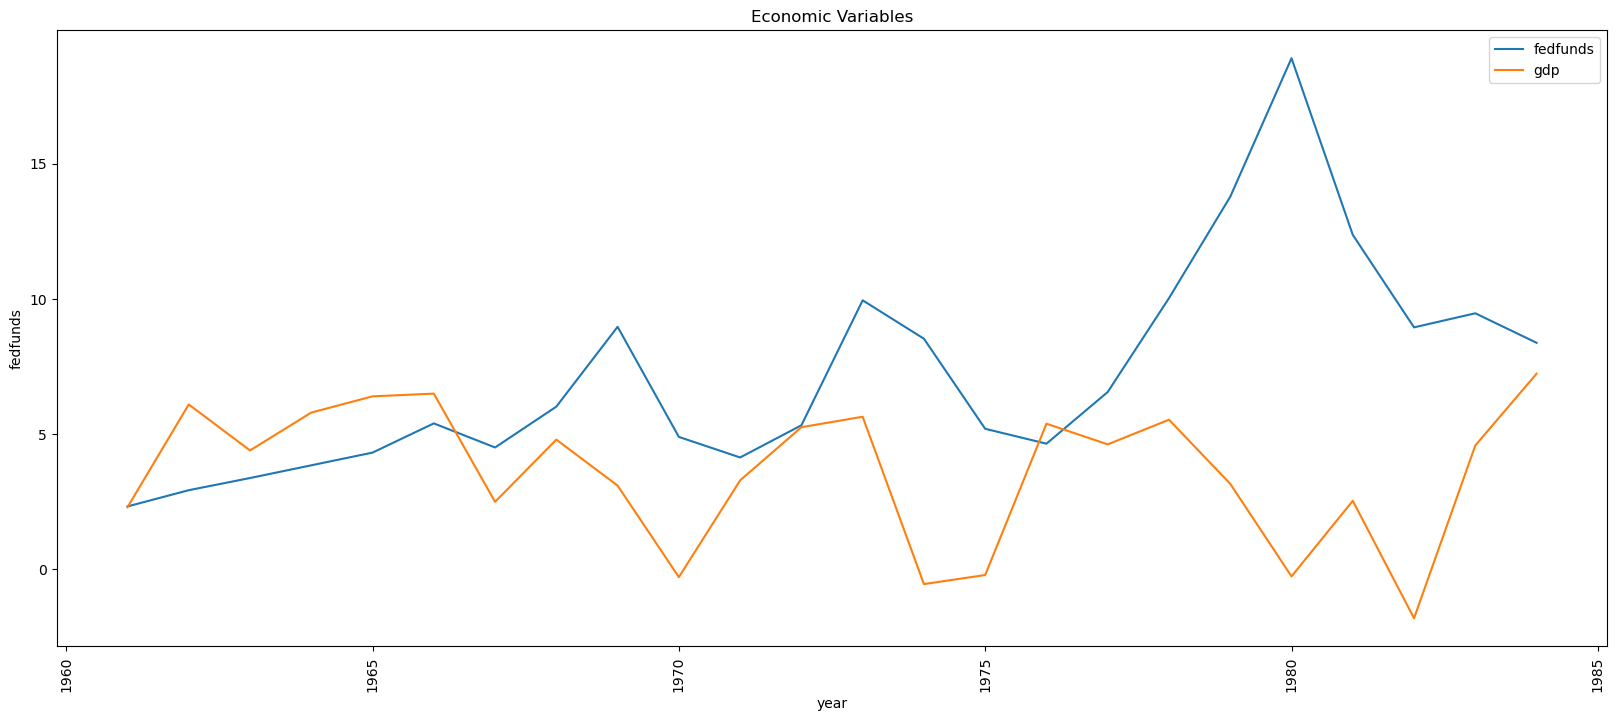

In [681]:
t_df = merge_df[(merge_df['year'] > 1960) & (merge_df['year'] < 1985)].copy()

plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=t_df, x='year', y='fedfunds' , label='fedfunds')
sns.lineplot(data=t_df, x='year', y='gdp' , label='gdp')
#sns.lineplot(data=t_df, x='year', y='cpi_per_annual' , label='cpi_per_annual')
plt.show()

In [682]:
long_df = merge_df.copy()
#long_df = merge_df[['cpi_per_annual','year']].copy()
#long_df['date'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']

long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

#long_df.sort_index(inplace=True)

long_df

,year,variable,value
0,1915,fedfunds,NaN
1,1916,fedfunds,NaN
2,1917,fedfunds,NaN
3,1918,fedfunds,NaN
4,1919,fedfunds,NaN
...,...,...,...
319,2018,cpi_per_annual,1.9
320,2019,cpi_per_annual,2.3
321,2020,cpi_per_annual,1.4
322,2021,cpi_per_annual,7.0


In [683]:
long_df[long_df.value < 0]

,year,variable,value
163,1970,gdp,-0.2835
167,1974,gdp,-0.5406
168,1975,gdp,-0.2055
173,1980,gdp,-0.2567
175,1982,gdp,-1.8029
184,1991,gdp,-0.1083
202,2009,gdp,-2.5999
213,2020,gdp,-2.7678
222,1921,cpi_per_annual,-10.8000
223,1922,cpi_per_annual,-2.3000


<Figure size 2000x1200 with 0 Axes>

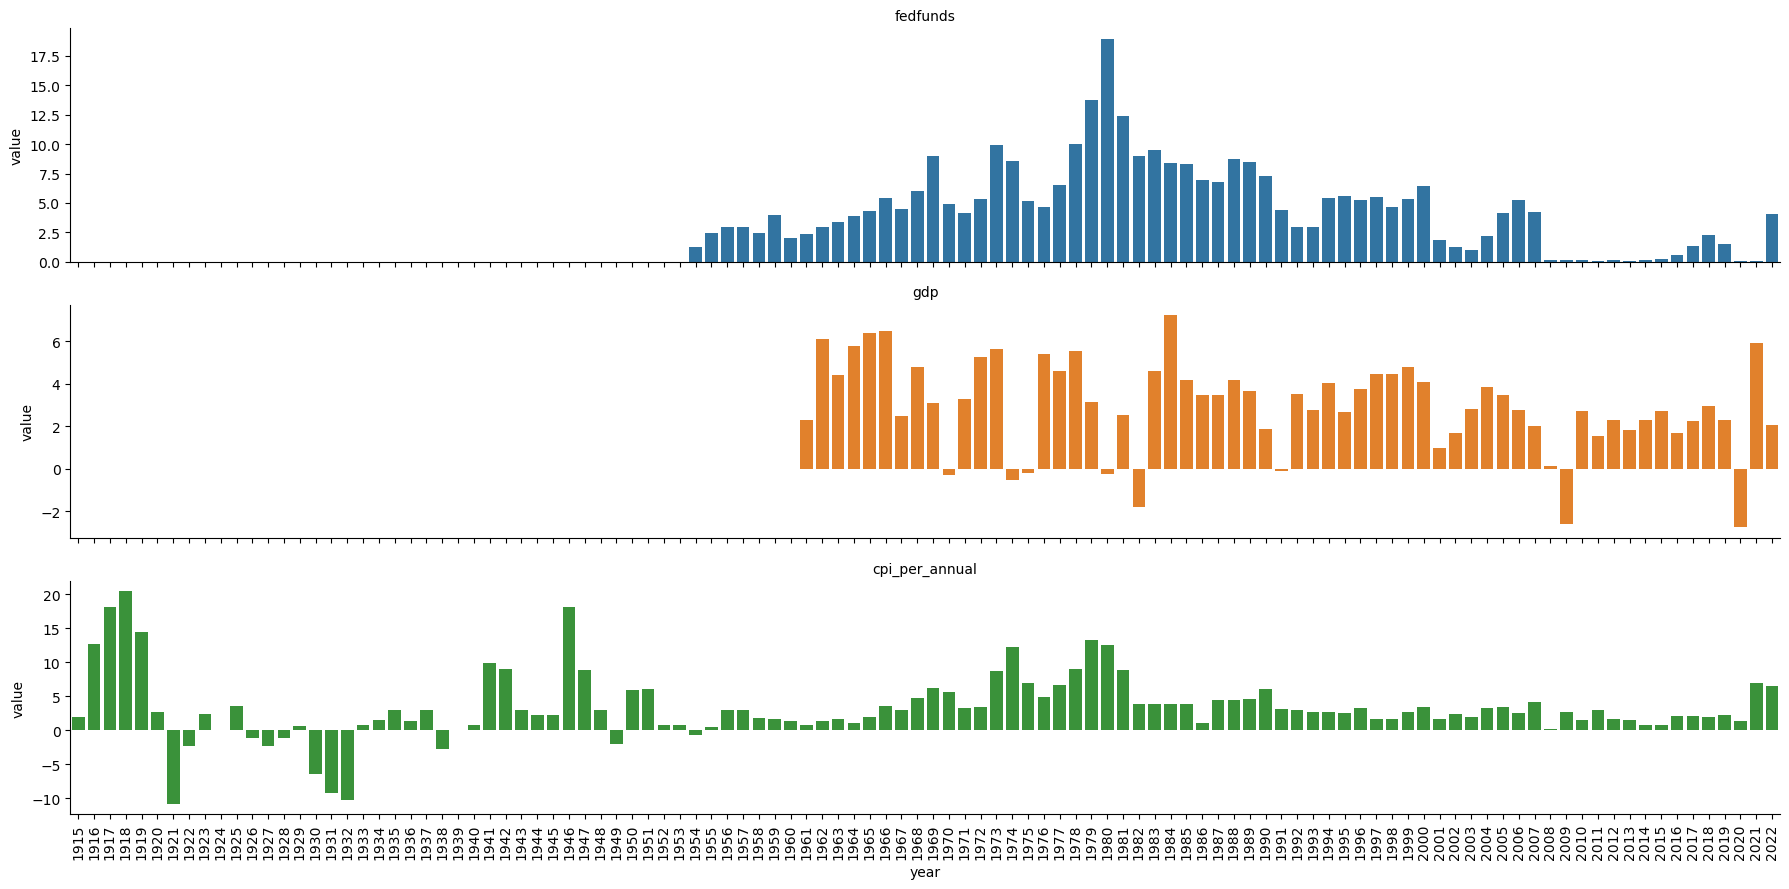

In [684]:
plt.figure(figsize=(20,12))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 

g.map_dataframe(sns.barplot, y="value", x='year')

plt.show()

# Great Deflation

In [685]:
merge_df

,fedfunds,gdp,cpi_per_annual,year
year,,,,
1915,NaN,NaN,2.0,1915
1916,NaN,NaN,12.6,1916
1917,NaN,NaN,18.1,1917
1918,NaN,NaN,20.4,1918
1919,NaN,NaN,14.5,1919
...,...,...,...,...
2018,2.27,2.9454,1.9,2018
2019,1.55,2.2944,2.3,2019
2020,0.09,-2.7678,1.4,2020


In [686]:
t_df = merge_df[(merge_df['year'] > 1965) & (merge_df['year'] < 1985)].copy()


long_df = t_df[['fedfunds','gdp','cpi_per_annual']].copy()
long_df['year'] = long_df.index

long_df = long_df.melt(id_vars=['year'])
long_df.columns = ['year','variable','value']
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')
#long_df['year'] = long_df['year'].astype('int')

long_df.head()

,year,variable,value
0,1966,fedfunds,5.40
1,1967,fedfunds,4.51
2,1968,fedfunds,6.02
3,1969,fedfunds,8.97
4,1970,fedfunds,4.90


<Figure size 2000x1200 with 0 Axes>

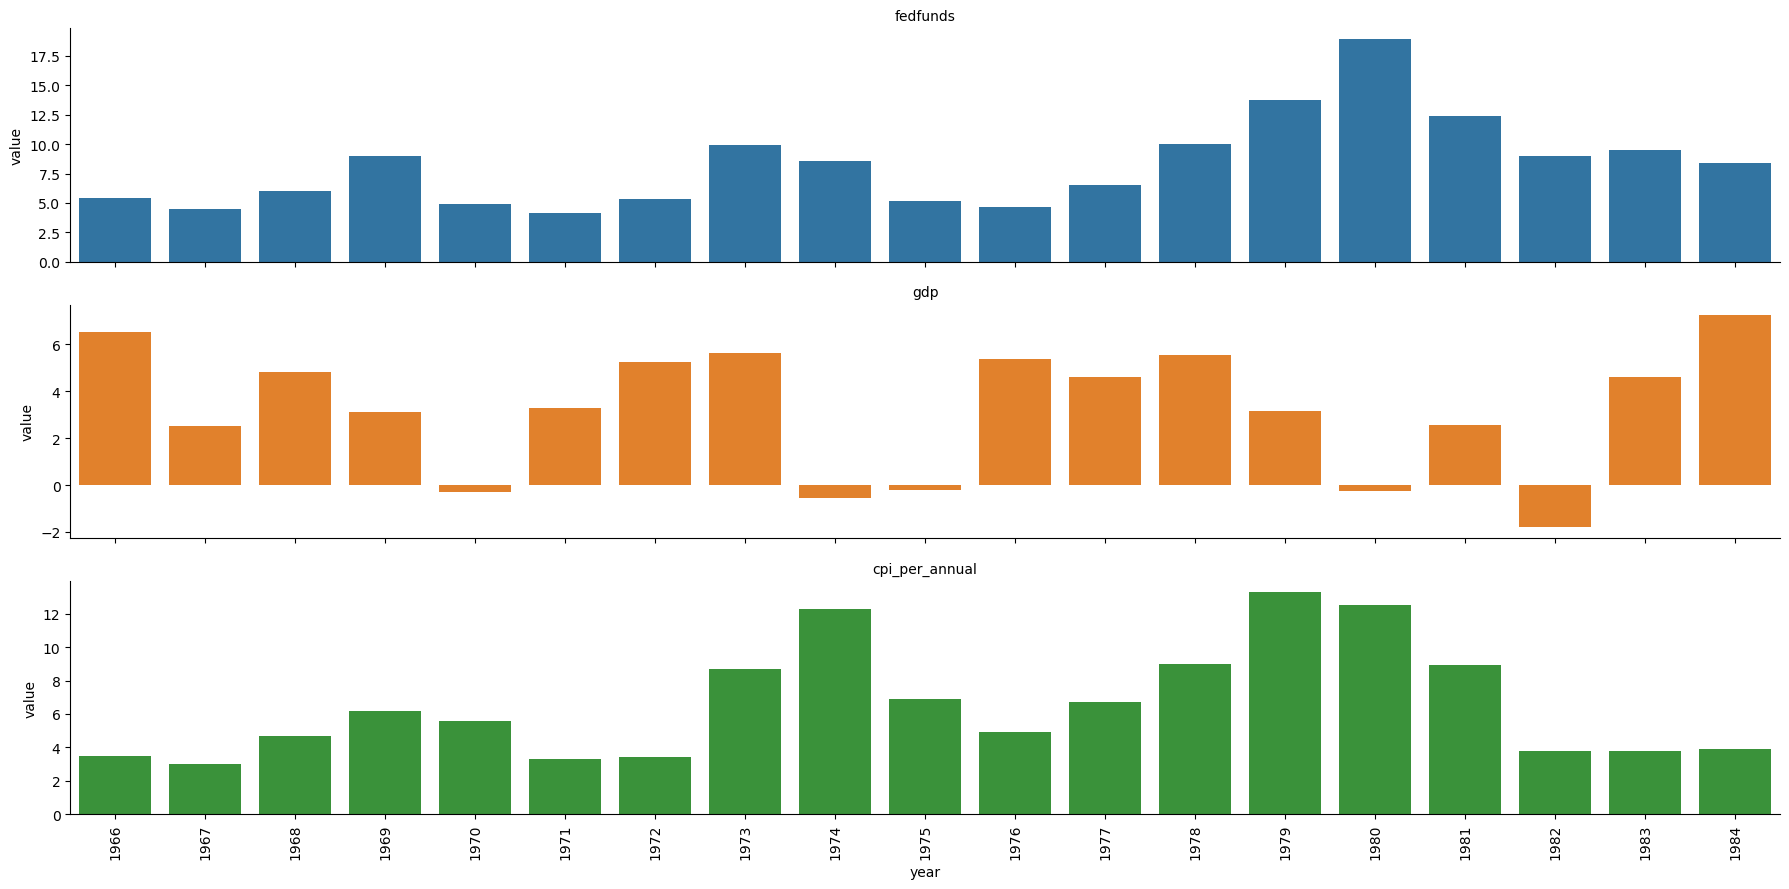

In [687]:
plt.figure(figsize=(20,12))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
g.map_dataframe(sns.barplot, y="value", x="year")

plt.show()

# Graph

Visualling all 3 timeseries on the same line chart with year as the x-axis and rate as the y axis generates an interesting picture of how the 3 rates have moved overtime. 

There are 6 distinct peaks in the federal funds rate. 

In [688]:
merge_df

,fedfunds,gdp,cpi_per_annual,year
year,,,,
1915,NaN,NaN,2.0,1915
1916,NaN,NaN,12.6,1916
1917,NaN,NaN,18.1,1917
1918,NaN,NaN,20.4,1918
1919,NaN,NaN,14.5,1919
...,...,...,...,...
2018,2.27,2.9454,1.9,2018
2019,1.55,2.2944,2.3,2019
2020,0.09,-2.7678,1.4,2020


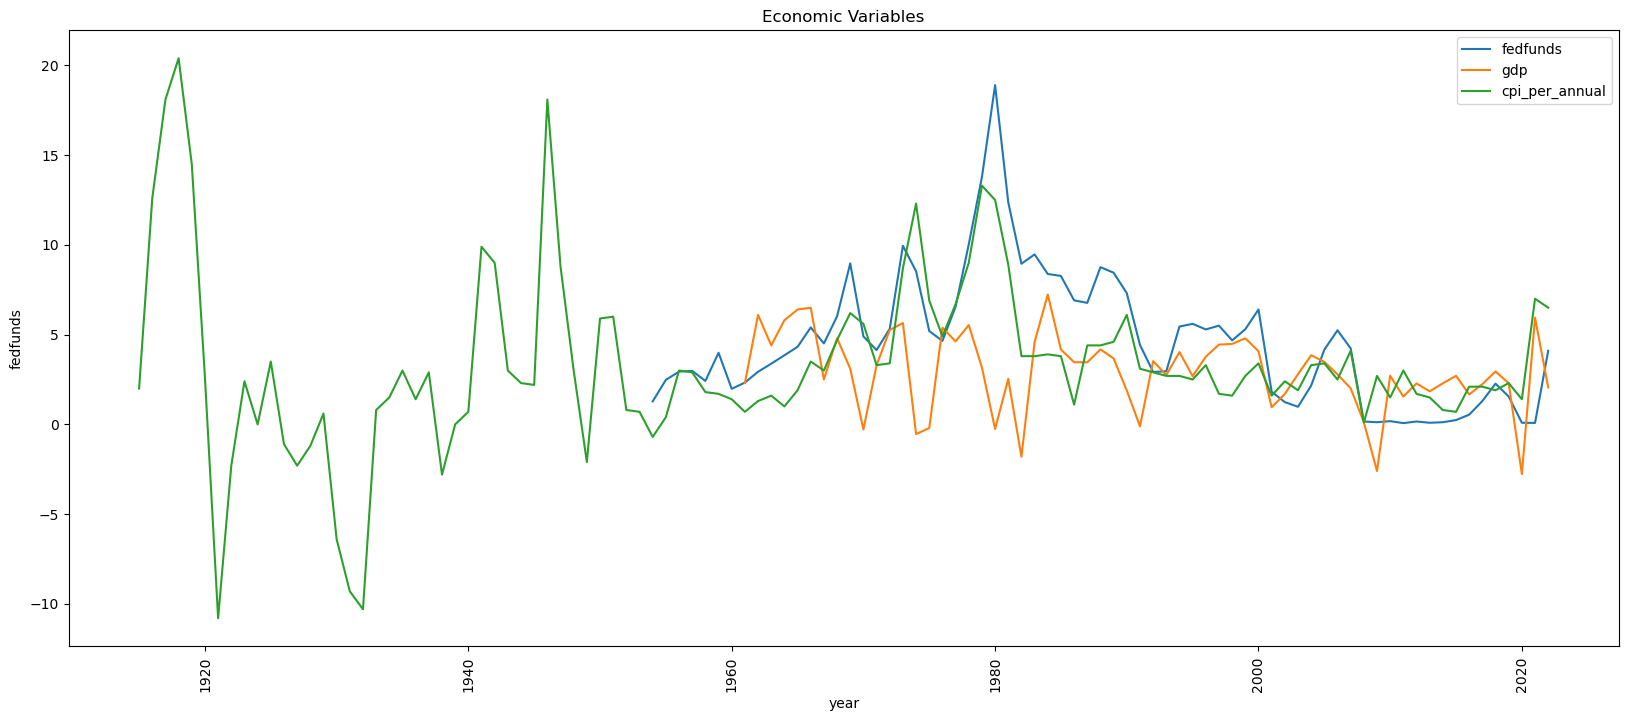

In [689]:
plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=merge_df, x='year', y='fedfunds' , label='fedfunds')
sns.lineplot(data=merge_df, x='year', y='gdp' , label='gdp')
sns.lineplot(data=merge_df, x='year', y='cpi_per_annual' , label='cpi_per_annual')
plt.show()

# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = fed_df.plot(ax=axs[0])
# Calculate % change and plot
ax = fed_df.rolling(window=5).aggregate(percent_change).plot(ax=axs[1])
ax.legend_.set_visible(False)

f_df = merge_df[merge_df['fedfunds'] > 7]
#f_df = f_df.resample('A').fillna(0, method='bfill')

plt.figure(figsize=(20,8))
plt.title('Economic Variables')
plt.xticks(rotation=90)
sns.lineplot(data=f_df, x='year', y='fedfunds' , label='fed funds')
sns.lineplot(data=f_df, x='year', y='gdp' , label='gdp')
sns.lineplot(data=f_df, x='year', y='cpi' , label='cpi')
plt.show()

In [690]:
long_df

,year,variable,value
0,1966,fedfunds,5.4000
1,1967,fedfunds,4.5100
2,1968,fedfunds,6.0200
3,1969,fedfunds,8.9700
4,1970,fedfunds,4.9000
5,1971,fedfunds,4.1400
6,1972,fedfunds,5.3300
7,1973,fedfunds,9.9500
8,1974,fedfunds,8.5300
9,1975,fedfunds,5.2000


<Figure size 2000x800 with 0 Axes>

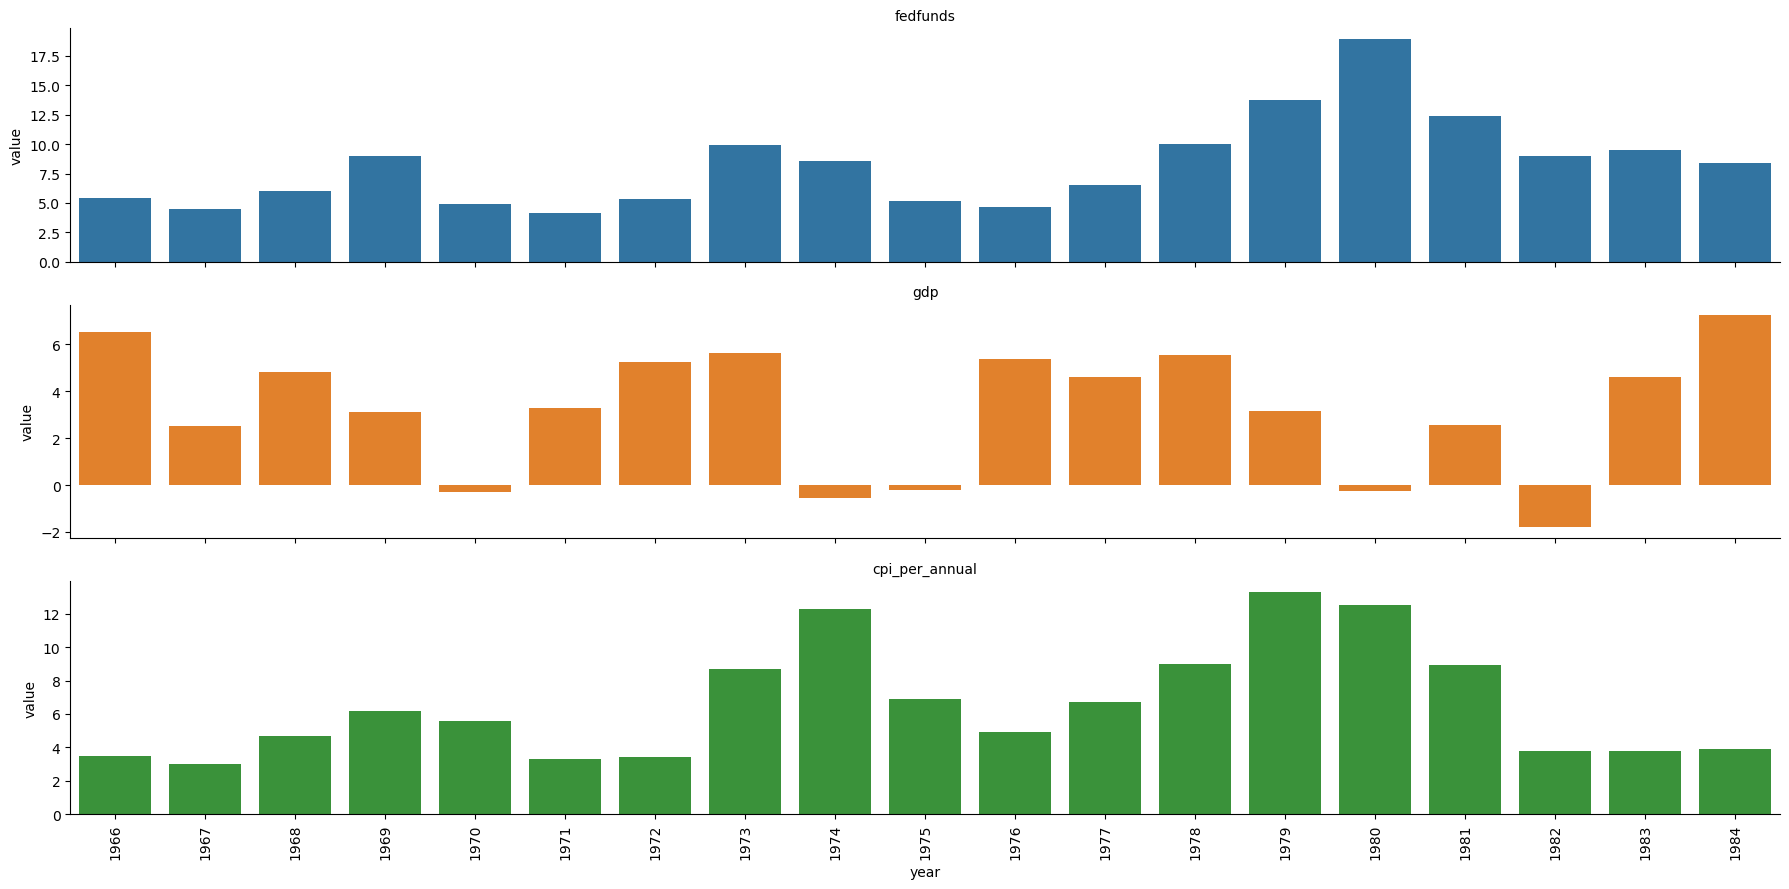

In [691]:
plt.figure(figsize=(20,8))

g = sns.FacetGrid(long_df, col='variable', hue='variable',
                  height=3, aspect=6,col_wrap=1, sharey=False)

g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tick_params(axis='x', labelrotation=90) 
#clrs = ['grey' if (x < max(rate)) else 'red' for x in value ]
g.map_dataframe(sns.barplot, y="value", x='year')

plt.show()

In [692]:
fed_df

,fedfunds,fedfunds_per_annual
year,,
1954,1.28,NaN
1955,2.48,93.75
1956,2.94,18.55
1957,2.98,1.36
1958,2.42,-18.79
...,...,...
2018,2.27,74.62
2019,1.55,-31.72
2020,0.09,-94.19


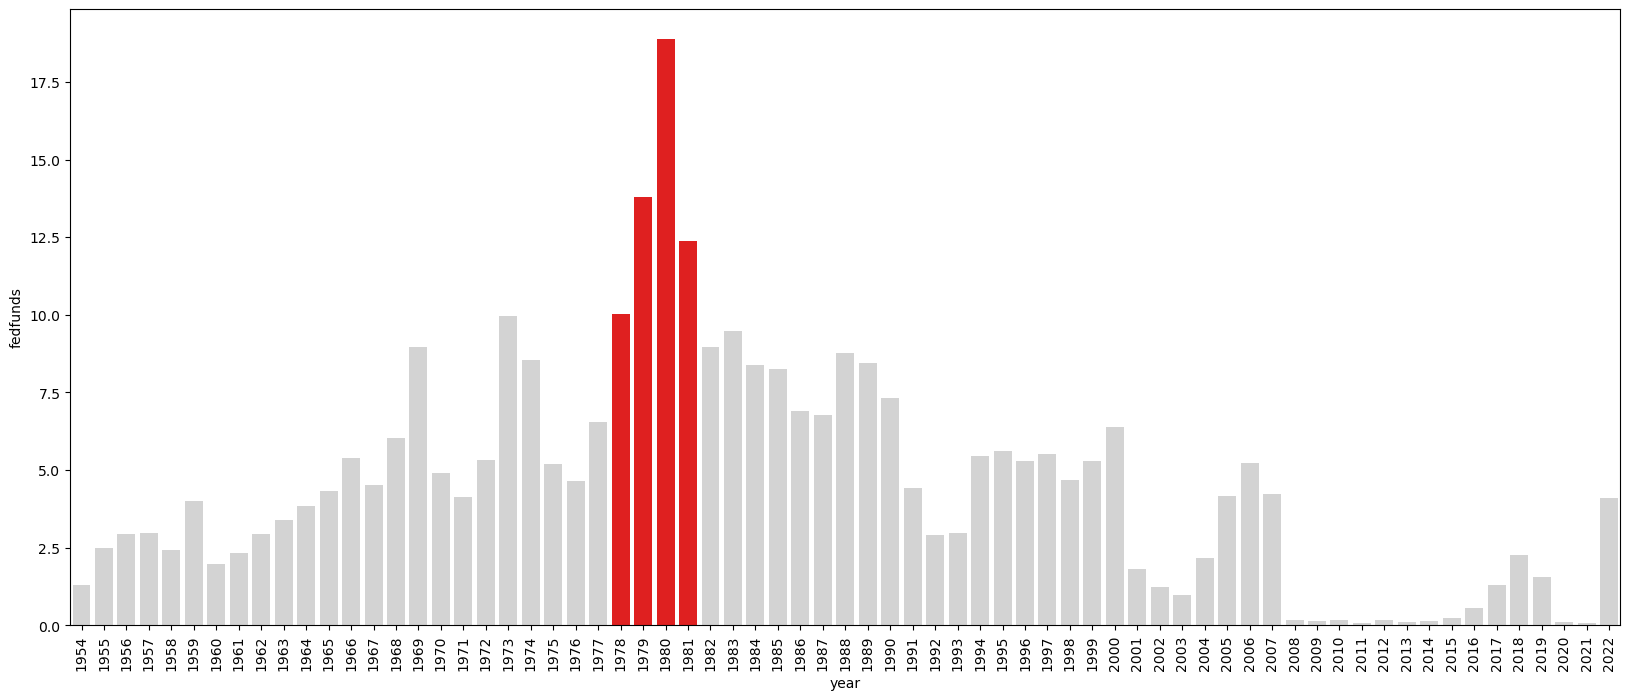

In [693]:
mean =  np.mean(fed_df.fedfunds)
sd = np.std(fed_df.fedfunds)

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
clrs = ['lightgrey' if (x < mean + 1.5*sd) else 'red' for x in fed_df.fedfunds]
sns.barplot(data=fed_df, x=fed_df.index, y='fedfunds' , label='fedfunds', palette=clrs)
plt.show()

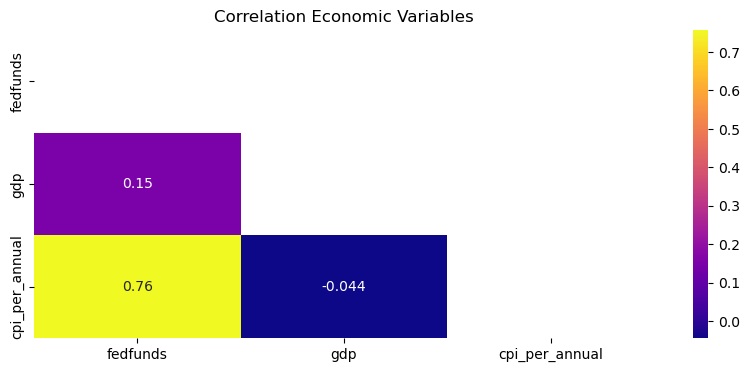

In [694]:
plt.figure(figsize=(10,4))
plt.title('Correlation Economic Variables')
mask = np.zeros_like(merge_df.drop(['year'], axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merge_df.drop(['year'], axis=1).corr().round(4), annot=True, mask=mask, cmap="plasma")

plt.show()

In [695]:
merge_df.drop(['year'], axis=1).corr().round(3)

,fedfunds,gdp,cpi_per_annual
fedfunds,1.000,0.151,0.756
gdp,0.151,1.000,-0.044
cpi_per_annual,0.756,-0.044,1.000
